[-2.  0.  2.  4.  6.  8. 10. 12. 14.]


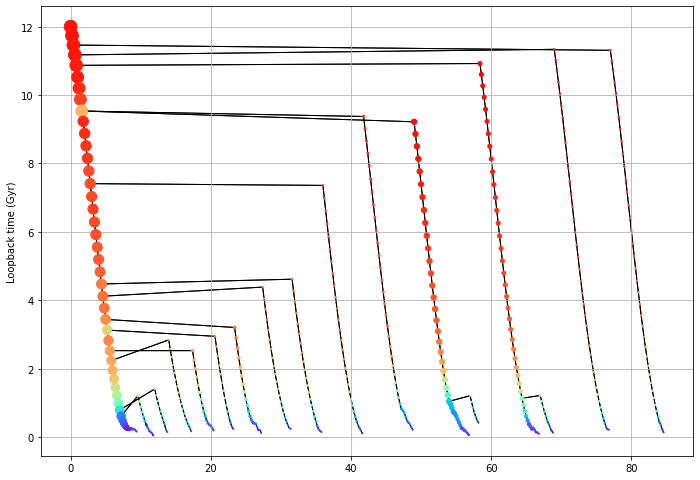

In [92]:
from os import getcwd

import matplotlib.pyplot as plt
from numpy import arange, log10, nan, linspace
import pandas as pd

import networkx as nx
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(11.69, 8.27))

#
# Obtenemos la masa y edad de la principal
# 
total_df = pd.read_csv(getcwd() + '/datos_completos/galaxias_13.csv')

z_list = []
y_list = []
xz_list = []
size_list = []
colour_list = []
age_list = []
x_list = []
available_nodes = []
size_nodes = []
colours_nodes = []
x = 0

g = nx.Graph()

# Crea los nodos
for idx, row in total_df.iterrows():
    if row['stellarMass'] > 0.1:
        available_nodes.append(str(int(row['galaxyID'])))
        g.add_node(str(int(row['galaxyID'])), pos=(x, float(row['massWeightedAge']))) 
        x = x + 0.2

        size_nodes.append(float(row['stellarMass'])*10)
        colours_nodes.append(float(row['mag_b']) - float(row['mag_v']))

# Crea las uniones
for idx, row in total_df.iterrows():
    if row['stellarMass'] > 0.1:
        progenitors_list = total_df[total_df['descendantId'].isin([row['galaxyID']])]['galaxyID'].tolist()
        for progenitorID in progenitors_list:
            if str(int(progenitorID)) in available_nodes:
                g.add_edge(str(int(progenitorID)), str(int(row['galaxyID'])))

pos = nx.get_node_attributes(g, 'pos')
# Dibuja los nodos
nx.draw(g, pos, node_size=size_nodes, node_color=colours_nodes, cmap='rainbow', ax=ax) # Muestra por pantalla
# Dibuja las flechas
nx.draw_networkx_edges(g, pos, edge_color='black', width=1)
limits=plt.axis('on') # turns on axis
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
ax.set_ylabel('Loopback time (Gyr)')
print(ax.get_yticks())
plt.grid(True)
plt.show()
# Guarda la figura
# plt.savefig('final_2.png')